In [2]:
%matplotlib inline
import sys
import copy
import datetime as dt
from pyEDM import *
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pcse
from pcse.models import Wofost72_WLP_FD

print("This notebook was built with:")
print(f"python version: {sys.version}")
print(f"PCSE version: {pcse.__version__}")

from dataproviders import parameters, agromanagement, weather
wofost = Wofost72_WLP_FD(parameters, weather, agromanagement)
wofost.run_till_terminate()
df = pd.DataFrame(wofost.get_output()).set_index("day")

seed = 20171027
rng = np.random.default_rng(seed)

This notebook was built with:
python version: 3.9.19 (main, Apr  6 2024, 17:57:55) 
[GCC 9.4.0]
PCSE version: 5.5.6


In [30]:
override_parameters = {}
override_parameters["TDWI"] = 160
override_parameters["WAV"] = 5
override_parameters["SPAN"] = 33
override_parameters["SMFCF"] = .33

p = copy.deepcopy(parameters)
for par, distr in override_parameters.items():
    p.set_override(par, distr)
member = Wofost72_WLP_FD(p, weather, agromanagement)
member.run_till_terminate()
results = pd.DataFrame(member.get_output())
results["Time"] = results.index + 1
cols = list(results.columns)
cols = cols[-1:] + cols[:-1]
results = results[cols]
results

,Time,day,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
0,1,2000-01-01,0.000000,0.110240,80.000000,0.000000,52.000000,28.000000,80.000000,0.004429,10.0,0.250000,14.090000
1,2,2000-01-02,0.008867,0.117624,85.358251,0.000000,55.482863,29.875388,85.358251,0.002547,11.2,0.244819,14.053816
2,3,2000-01-03,0.017157,0.125290,90.921918,0.000000,59.099247,31.822671,90.921918,0.001995,12.4,0.242331,14.038579
3,4,2000-01-04,0.024293,0.133008,96.522179,0.000000,62.739416,33.782763,96.522179,0.004869,13.6,0.240616,14.027895
4,5,2000-01-05,0.032706,0.141716,102.841829,0.000000,66.847189,35.994640,102.841829,0.002797,14.8,0.238408,14.005806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,148,2000-05-27,1.934169,0.003116,12332.320594,6649.452325,2486.526710,3196.341558,1267.657506,0.000822,60.0,0.240065,14.403914
148,149,2000-05-28,1.953874,0.003116,12332.320594,6649.452325,2486.526710,3196.341558,1267.657506,0.000826,60.0,0.237451,14.247070
149,150,2000-05-29,1.974056,0.000000,12332.320594,6649.452325,2486.526710,3196.341558,1267.657506,0.000000,60.0,0.235169,14.110155
150,151,2000-05-30,1.995758,0.000000,12332.320594,6649.452325,2486.526710,3196.341558,1267.657506,0.000000,60.0,0.232671,13.960288


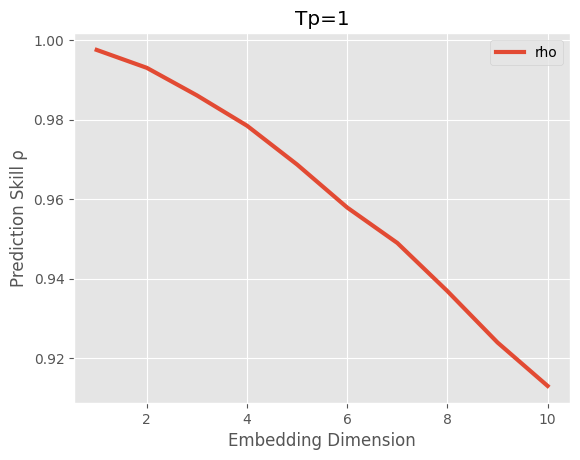

In [35]:
EmbedDimension( dataFrame = results, lib = "1 100", pred = "101 150", 
                columns = "LAI", target = "LAI" );

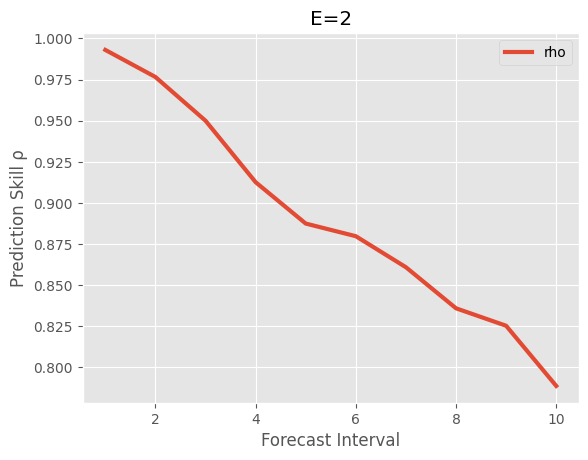

In [36]:
PredictInterval( dataFrame = results, lib = "1 100", pred = "101 150", 
                columns = "LAI", target = "LAI", E = 2 );

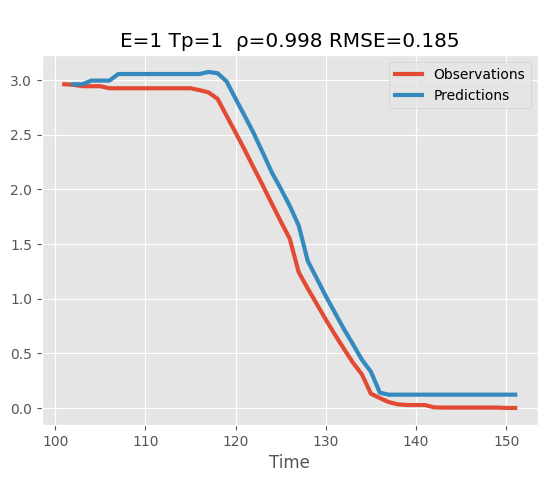

In [38]:
Simplex( dataFrame = results, lib = "1 100", pred = "101 150", 
                columns = "LAI", target = "LAI", E = 1 , showPlot = True );

In [65]:
from scipy.linalg import lstsq
from sklearn.linear_model import LinearRegression

PredictNonlinear( dataFrame = results, lib = "1 100", pred = "101 150", 
                columns = "LAI", target = "LAI", E = 1 , showPlot = True, solver = LinearRegression );

Exception: SMap(): Invalid solver LinearRegression.
Supported solvers: ['function', 'lstsq', 'LinearRegression', 'SGDRegressor', 'Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'Lars', 'LarsCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'ElasticNet', 'ElasticNetCV', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV']